In [49]:
!pip install scikit-optimize

## 📥 Load Dataset & Preview

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils import resample
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import warnings
warnings.filterwarnings('ignore')


In [51]:
df = pd.read_csv("framingham.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Contoh data dari dataset Framingham:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


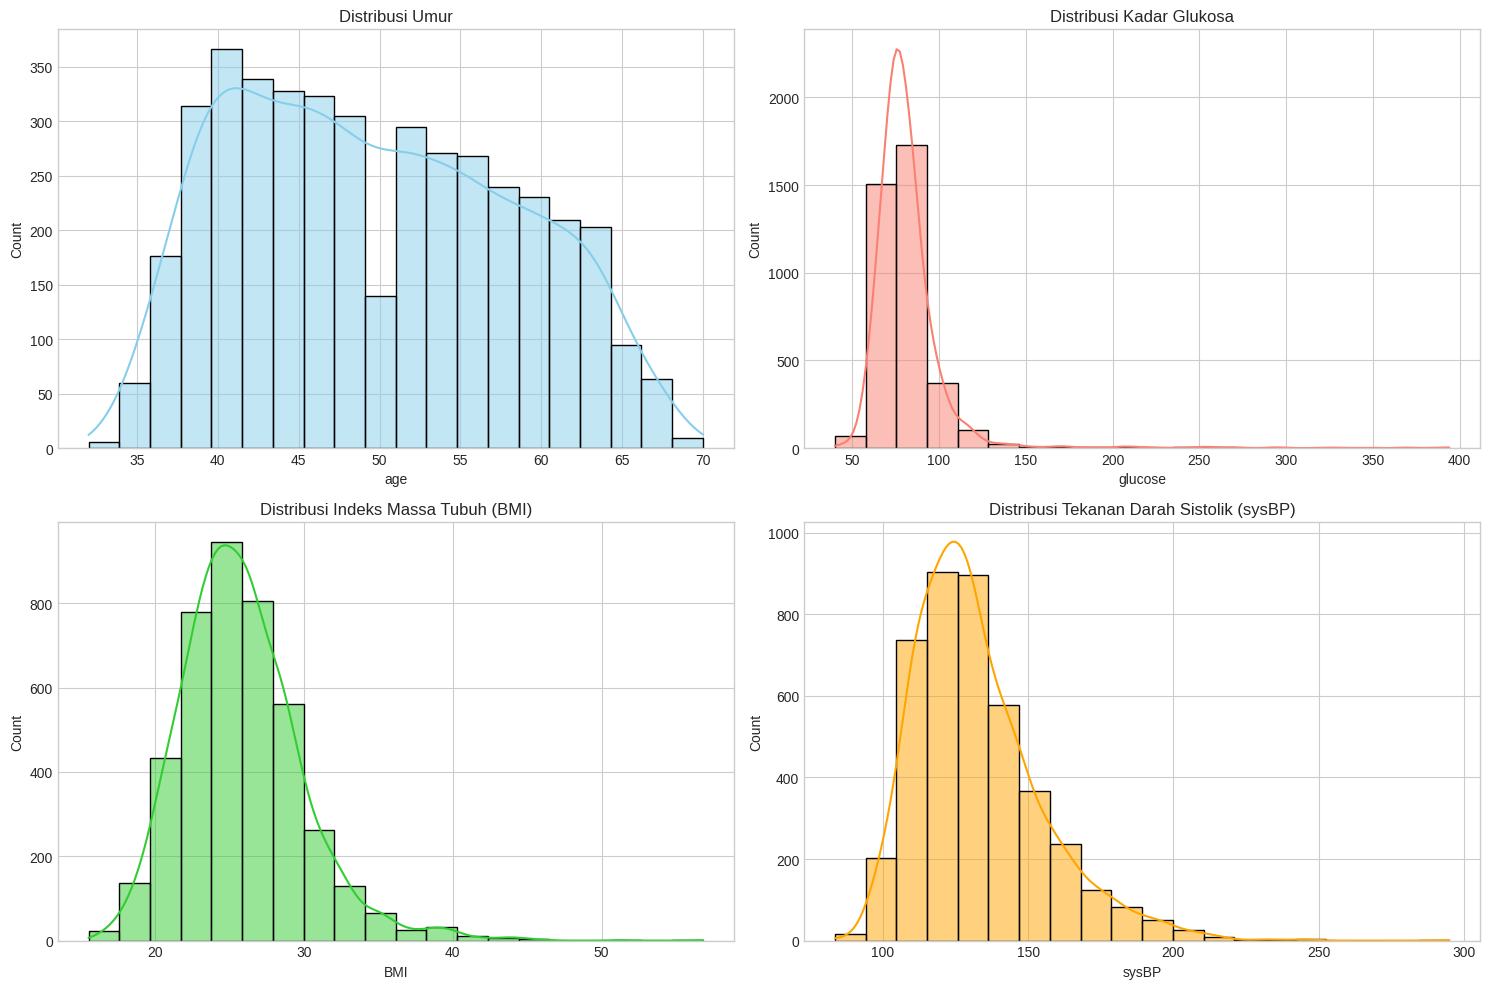

In [52]:
# Import pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('framingham.csv')

# Tampilkan 5 data pertama sebagai tabel
print("Contoh data dari dataset Framingham:")
display(df.head())

# Ukuran plot
plt.figure(figsize=(15, 10))

# Histogram Usia
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Umur')

# Histogram Glukosa
plt.subplot(2, 2, 2)
sns.histplot(df['glucose'].dropna(), kde=True, bins=20, color='salmon')
plt.title('Distribusi Kadar Glukosa')

# Histogram BMI
plt.subplot(2, 2, 3)
sns.histplot(df['BMI'].dropna(), kde=True, bins=20, color='limegreen')
plt.title('Distribusi Indeks Massa Tubuh (BMI)')

# Histogram Tekanan Darah Sistolik
plt.subplot(2, 2, 4)
sns.histplot(df['sysBP'], kde=True, bins=20, color='orange')
plt.title('Distribusi Tekanan Darah Sistolik (sysBP)')

plt.tight_layout()
plt.show()


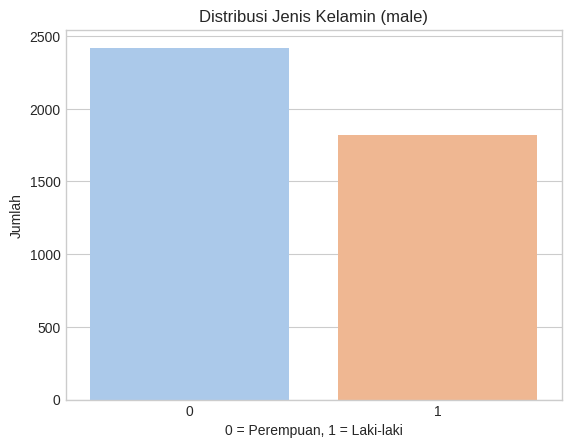

In [53]:
sns.countplot(x='male', data=df, palette='pastel')
plt.title('Distribusi Jenis Kelamin (male)')
plt.xlabel('0 = Perempuan, 1 = Laki-laki')
plt.ylabel('Jumlah')
plt.show()


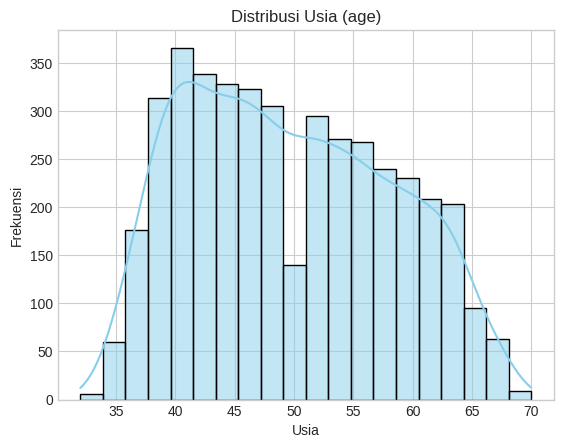

In [54]:
sns.histplot(df['age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribusi Usia (age)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


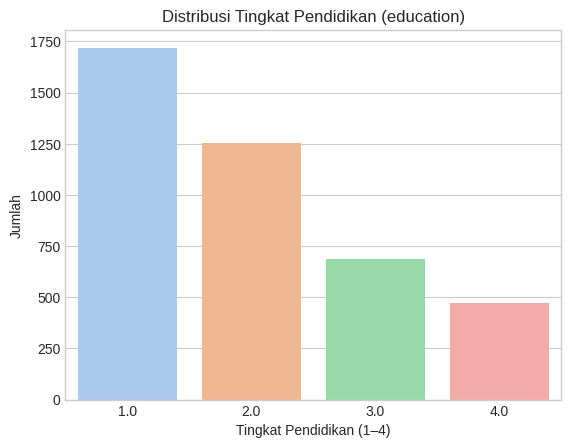

In [55]:
sns.countplot(x='education', data=df, palette='pastel')
plt.title('Distribusi Tingkat Pendidikan (education)')
plt.xlabel('Tingkat Pendidikan (1–4)')
plt.ylabel('Jumlah')
plt.show()


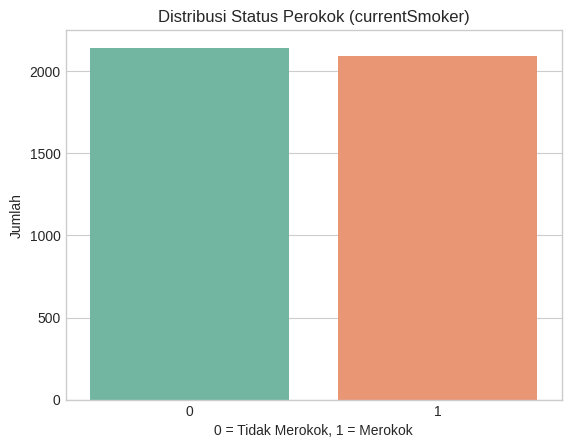

In [56]:
sns.countplot(x='currentSmoker', data=df, palette='Set2')
plt.title('Distribusi Status Perokok (currentSmoker)')
plt.xlabel('0 = Tidak Merokok, 1 = Merokok')
plt.ylabel('Jumlah')
plt.show()


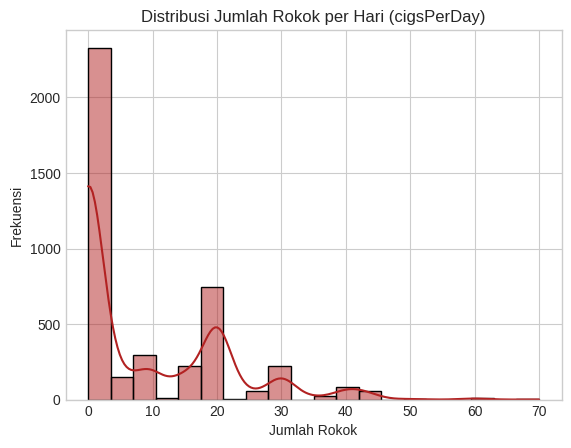

In [57]:
sns.histplot(df['cigsPerDay'].dropna(), kde=True, bins=20, color='firebrick')
plt.title('Distribusi Jumlah Rokok per Hari (cigsPerDay)')
plt.xlabel('Jumlah Rokok')
plt.ylabel('Frekuensi')
plt.show()


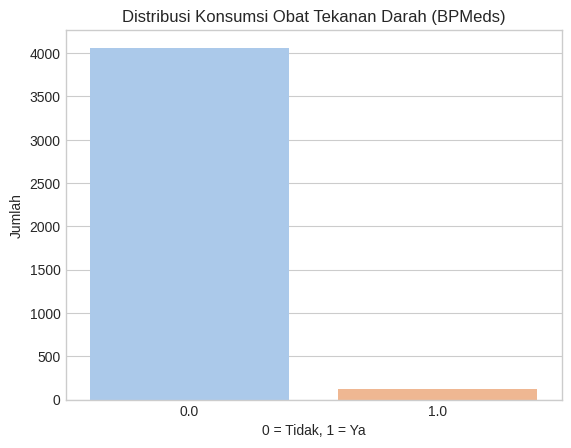

In [58]:
sns.countplot(x='BPMeds', data=df, palette='pastel')
plt.title('Distribusi Konsumsi Obat Tekanan Darah (BPMeds)')
plt.xlabel('0 = Tidak, 1 = Ya')
plt.ylabel('Jumlah')
plt.show()


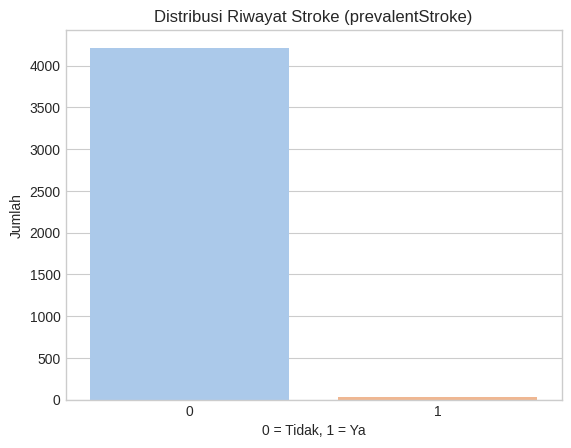

In [59]:
sns.countplot(x='prevalentStroke', data=df, palette='pastel')
plt.title('Distribusi Riwayat Stroke (prevalentStroke)')
plt.xlabel('0 = Tidak, 1 = Ya')
plt.ylabel('Jumlah')
plt.show()


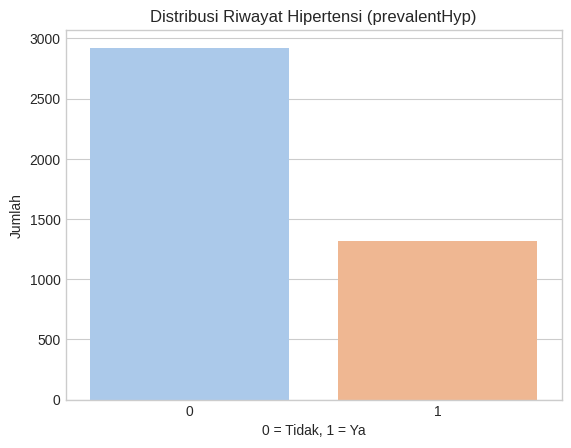

In [60]:
sns.countplot(x='prevalentHyp', data=df, palette='pastel')
plt.title('Distribusi Riwayat Hipertensi (prevalentHyp)')
plt.xlabel('0 = Tidak, 1 = Ya')
plt.ylabel('Jumlah')
plt.show()


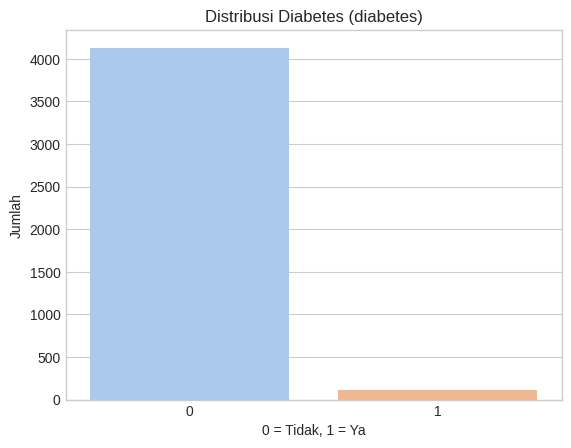

In [61]:
sns.countplot(x='diabetes', data=df, palette='pastel')
plt.title('Distribusi Diabetes (diabetes)')
plt.xlabel('0 = Tidak, 1 = Ya')
plt.ylabel('Jumlah')
plt.show()


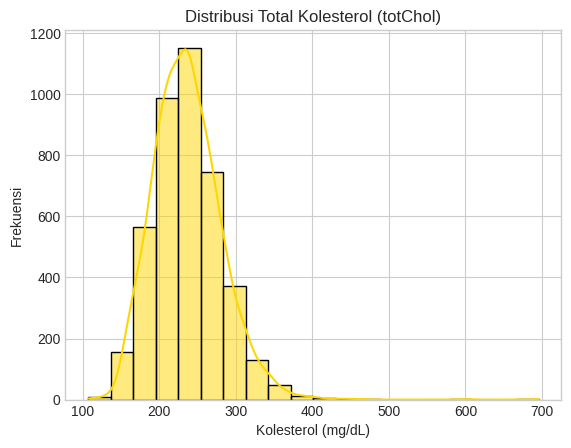

In [62]:
sns.histplot(df['totChol'].dropna(), kde=True, bins=20, color='gold')
plt.title('Distribusi Total Kolesterol (totChol)')
plt.xlabel('Kolesterol (mg/dL)')
plt.ylabel('Frekuensi')
plt.show()


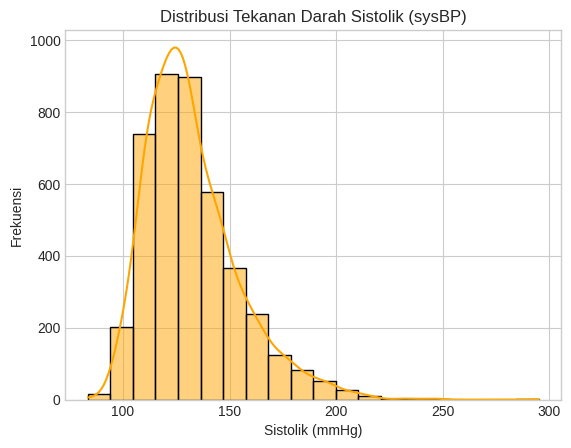

In [63]:
sns.histplot(df['sysBP'].dropna(), kde=True, bins=20, color='orange')
plt.title('Distribusi Tekanan Darah Sistolik (sysBP)')
plt.xlabel('Sistolik (mmHg)')
plt.ylabel('Frekuensi')
plt.show()


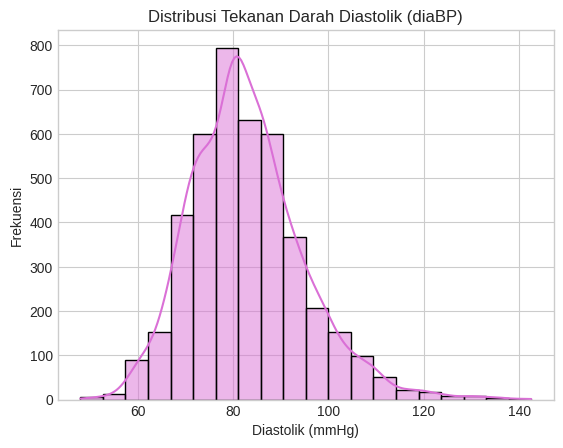

In [64]:
sns.histplot(df['diaBP'].dropna(), kde=True, bins=20, color='orchid')
plt.title('Distribusi Tekanan Darah Diastolik (diaBP)')
plt.xlabel('Diastolik (mmHg)')
plt.ylabel('Frekuensi')
plt.show()


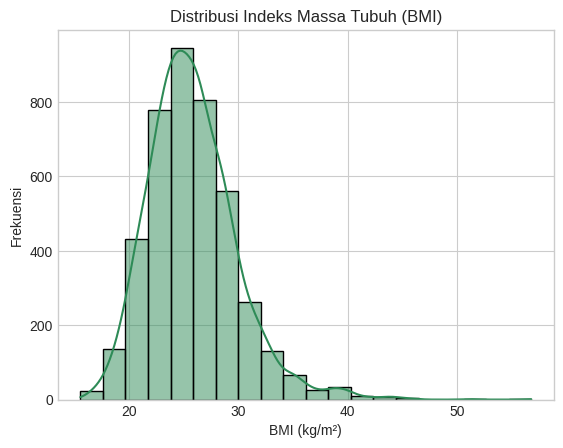

In [65]:
sns.histplot(df['BMI'].dropna(), kde=True, bins=20, color='seagreen')
plt.title('Distribusi Indeks Massa Tubuh (BMI)')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Frekuensi')
plt.show()


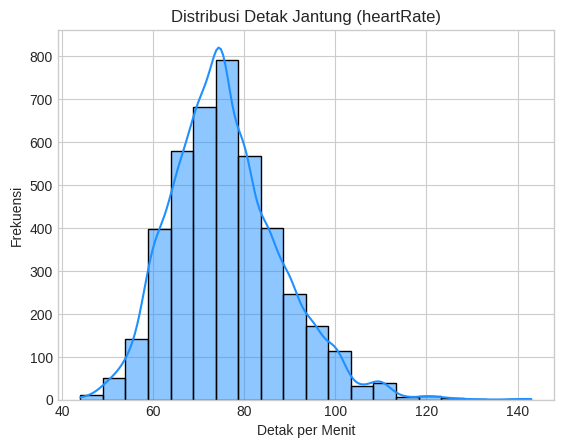

In [66]:
sns.histplot(df['heartRate'].dropna(), kde=True, bins=20, color='dodgerblue')
plt.title('Distribusi Detak Jantung (heartRate)')
plt.xlabel('Detak per Menit')
plt.ylabel('Frekuensi')
plt.show()


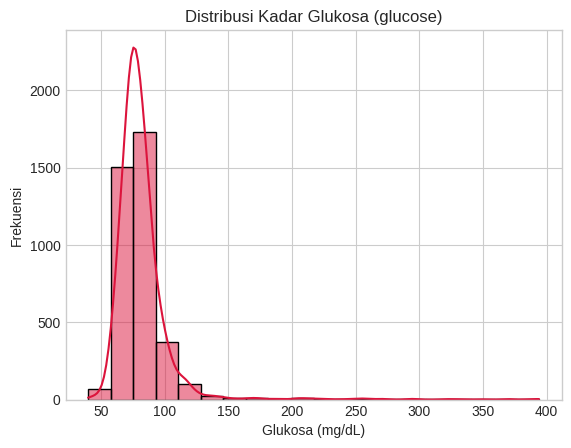

In [67]:
sns.histplot(df['glucose'].dropna(), kde=True, bins=20, color='crimson')
plt.title('Distribusi Kadar Glukosa (glucose)')
plt.xlabel('Glukosa (mg/dL)')
plt.ylabel('Frekuensi')
plt.show()


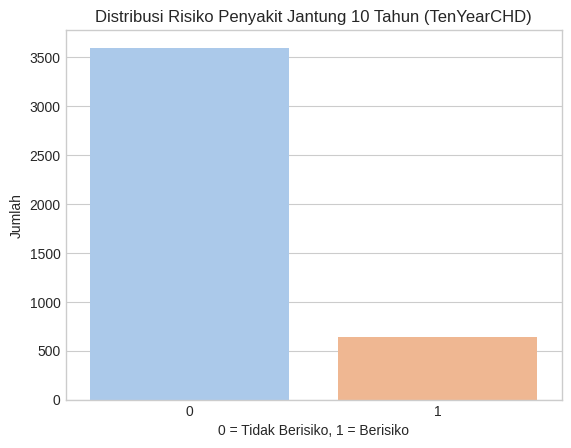

In [68]:
sns.countplot(x='TenYearCHD', data=df, palette='pastel')
plt.title('Distribusi Risiko Penyakit Jantung 10 Tahun (TenYearCHD)')
plt.xlabel('0 = Tidak Berisiko, 1 = Berisiko')
plt.ylabel('Jumlah')
plt.show()


## 📊 Exploratory Data Analysis

In [69]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nStatistik ringkasan awal:")
print(df.describe())


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Statistik ringkasan awal:
              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000  

## 🧽 Imputasi & Normalisasi

In [70]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

scaler = StandardScaler()
X_all = pd.DataFrame(scaler.fit_transform(df_imputed.drop(columns='TenYearCHD')),
                     columns=df.drop(columns='TenYearCHD').columns)
y_all = df_imputed['TenYearCHD']


In [71]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Salin dataframe untuk preprocessing
df_preprocessed = df.copy()

# Imputasi missing values
numeric_cols = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns.drop('TenYearCHD')

# Imputasi median untuk semua kolom numerik
imputer = SimpleImputer(strategy='median')
df_preprocessed[numeric_cols] = imputer.fit_transform(df_preprocessed[numeric_cols])

# Normalisasi dengan StandardScaler
scaler = StandardScaler()
df_preprocessed[numeric_cols] = scaler.fit_transform(df_preprocessed[numeric_cols])

# Tampilkan ringkasan hasil preprocessing
df_preprocessed.describe().T


,count,mean,std,min,25%,50%,75%,max
male,4240.0,-1.206582e-16,1.000118,-0.867217,-0.867217,-0.867217,1.153113,1.153113
age,4240.0,1.256856e-16,1.000118,-2.050902,-0.884303,-0.067685,0.748934,2.382172
education,4240.0,-7.541138e-17,1.000118,-0.973172,-0.973172,0.019908,1.012988,2.006069
currentSmoker,4240.0,-1.005485e-17,1.000118,-0.988276,-0.988276,-0.988276,1.011863,1.011863
cigsPerDay,4240.0,-2.513713e-17,1.000118,-0.751412,-0.751412,-0.751412,0.928784,5.129274
BPMeds,4240.0,-2.513713e-17,1.000118,-0.173569,-0.173569,-0.173569,-0.173569,5.761384
prevalentStroke,4240.0,-6.703233e-18,1.000118,-0.077014,-0.077014,-0.077014,-0.077014,12.984606
prevalentHyp,4240.0,6.032910e-17,1.000118,-0.671241,-0.671241,-0.671241,1.489778,1.489778
diabetes,4240.0,1.340647e-17,1.000118,-0.162437,-0.162437,-0.162437,-0.162437,6.156223
totChol,4240.0,-1.022243e-16,1.000118,-2.925500,-0.691910,-0.060187,0.571535,10.363236


## ✂️ Train-Test Split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, stratify=y_all, random_state=42)
print("Distribusi kelas training:")
print(y_train.value_counts())
print("Distribusi kelas testing:")
print(y_test.value_counts())


Distribusi kelas training:
TenYearCHD
0.0    2877
1.0     515
Name: count, dtype: int64
Distribusi kelas testing:
TenYearCHD
0.0    719
1.0    129
Name: count, dtype: int64


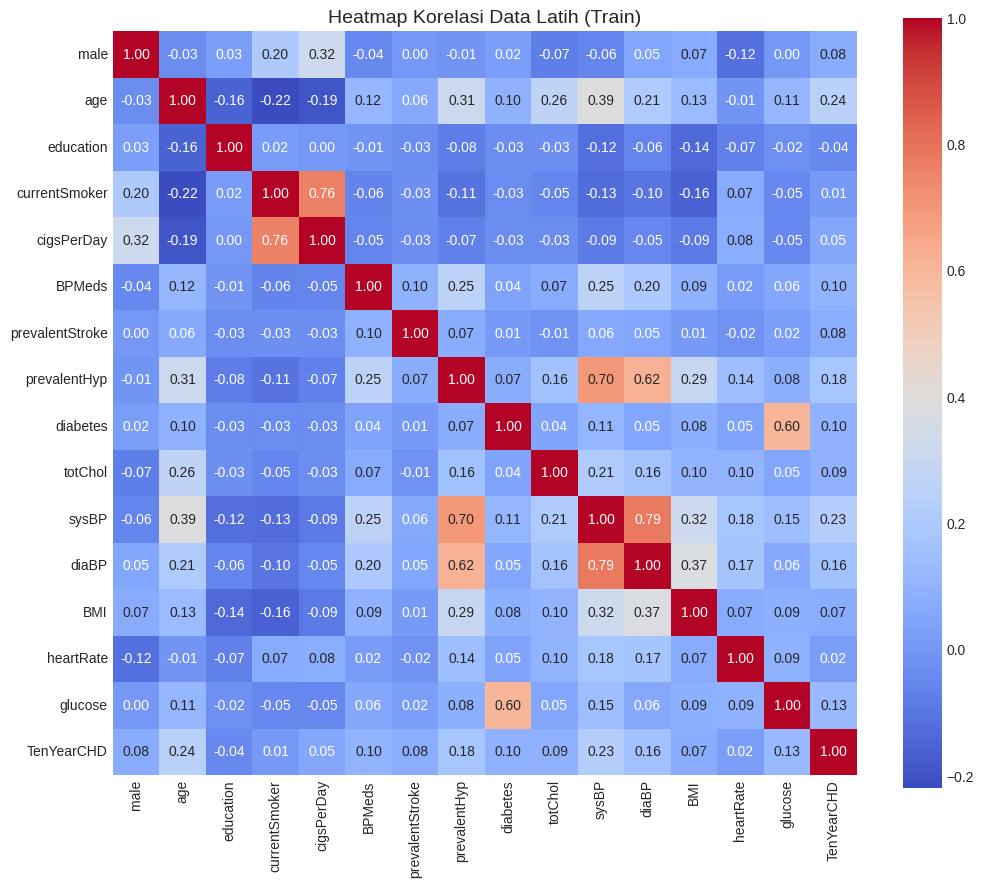

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan kembali fitur dan label jika ingin korelasi dengan target
X_train_full = X_train.copy()
X_train_full['TenYearCHD'] = y_train.values

X_test_full = X_test.copy()
X_test_full['TenYearCHD'] = y_test.values

# Heatmap untuk Data Train
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_full.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi Data Latih (Train)', fontsize=14)
plt.show()

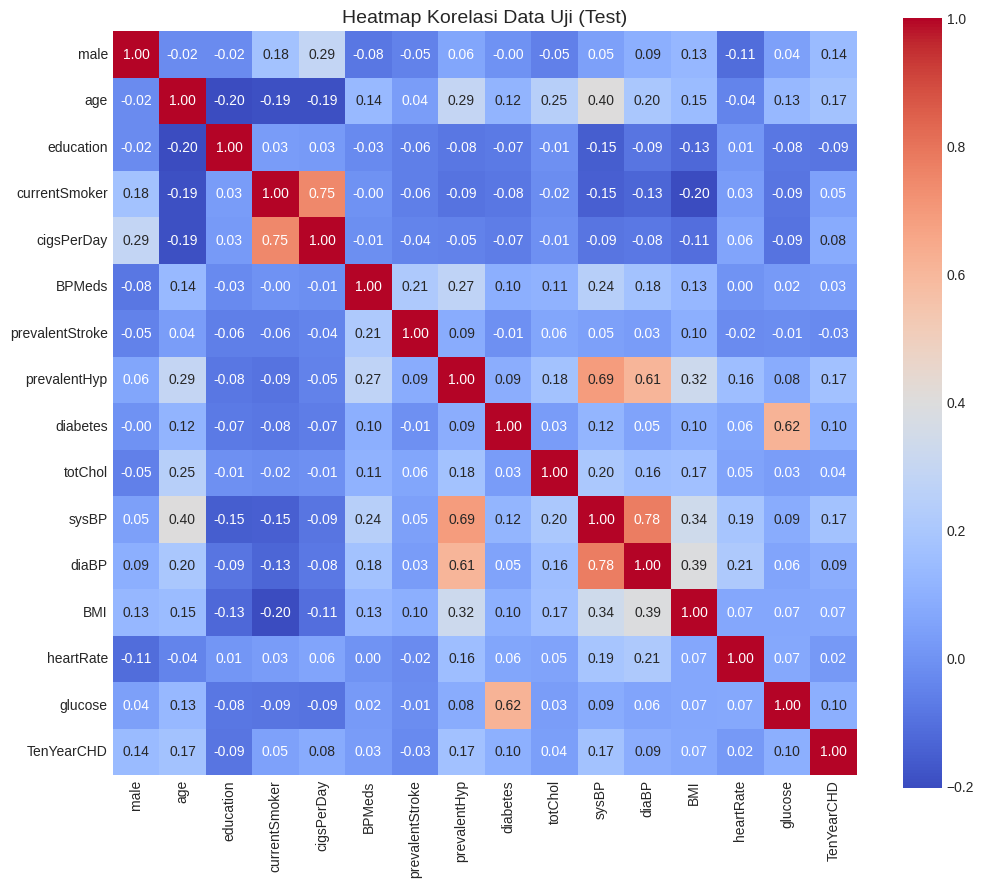

In [74]:
# Heatmap untuk Data Test
plt.figure(figsize=(12, 10))
sns.heatmap(X_test_full.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi Data Uji (Test)', fontsize=14)
plt.show()


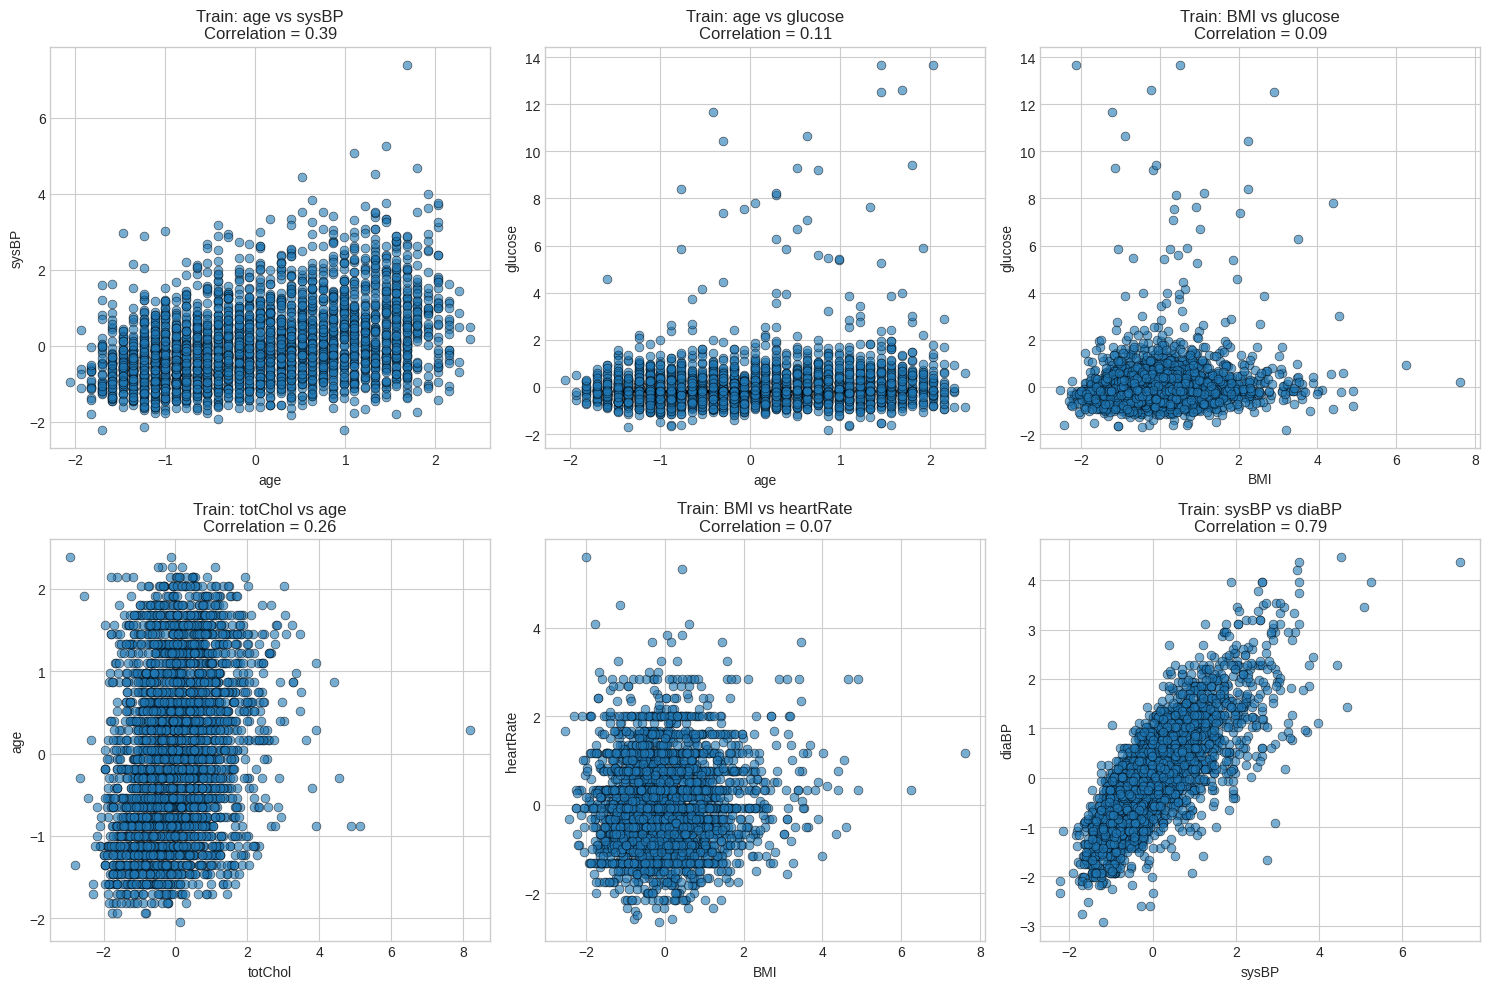

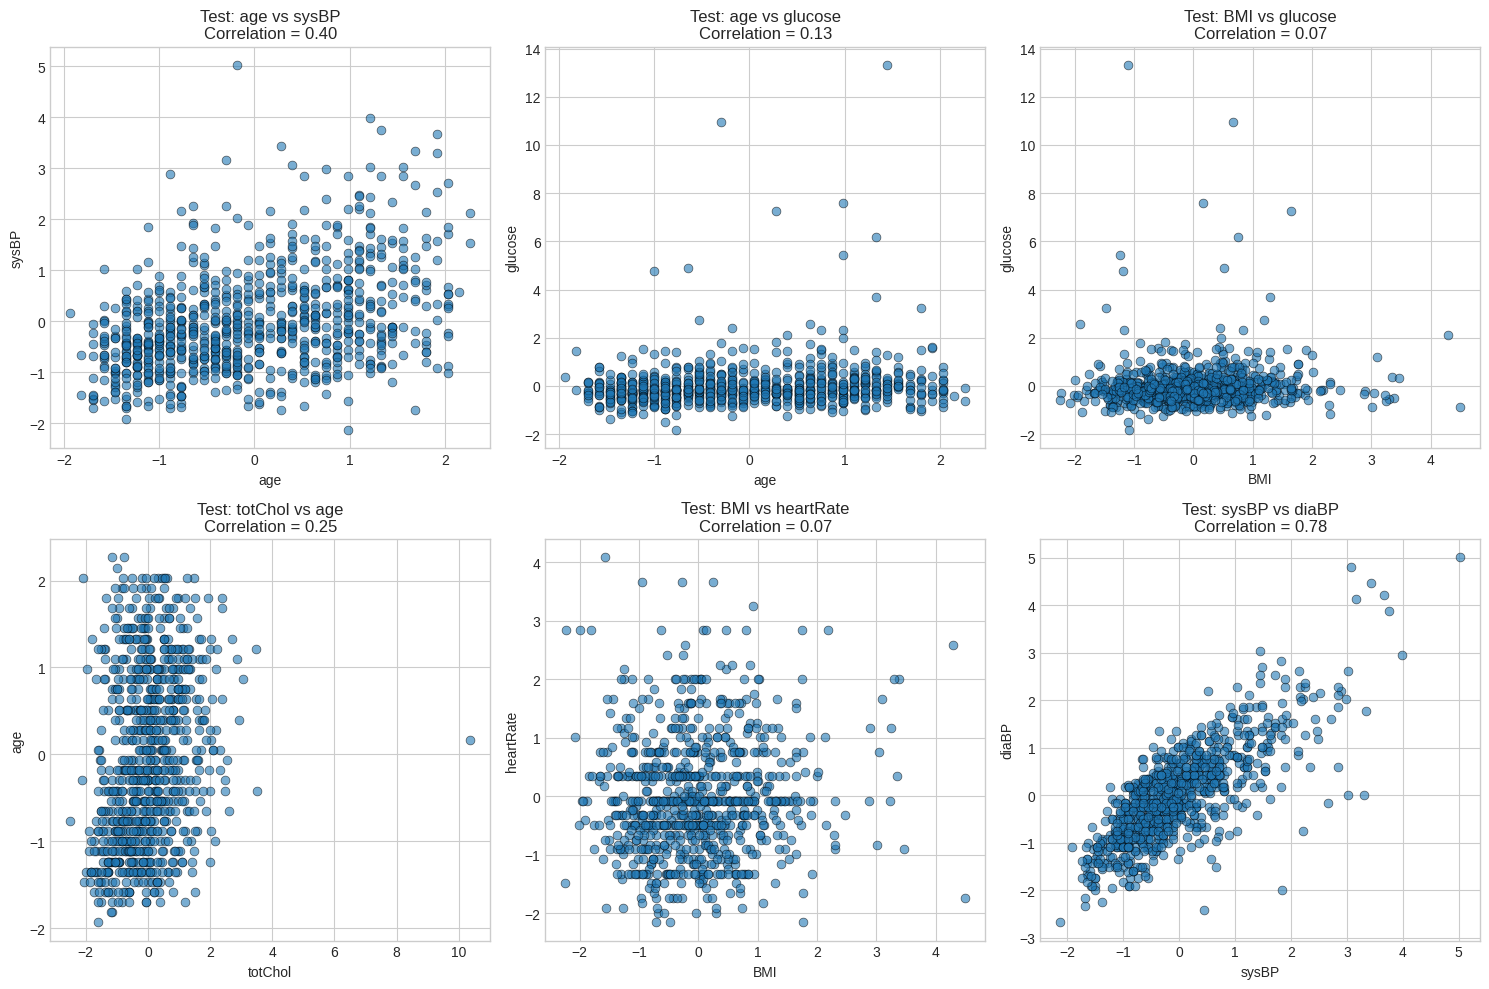

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar pasangan fitur yang relevan dari dataset Framingham
feature_pairs = [
    ('age', 'sysBP'),
    ('age', 'glucose'),
    ('BMI', 'glucose'),
    ('totChol', 'age'),
    ('BMI', 'heartRate'),
    ('sysBP', 'diaBP')
]

# Fungsi untuk buat scatter plot + korelasi
def scatter_corr_plot(data, pairs, title_prefix=''):
    plt.figure(figsize=(15, 10))
    for i, (x, y) in enumerate(pairs):
        plt.subplot(2, 3, i+1)
        sns.scatterplot(x=data[x], y=data[y], edgecolor='black', s=40, alpha=0.6)
        corr = data[[x, y]].corr().iloc[0, 1]
        plt.title(f'{title_prefix} {x} vs {y}\nCorrelation = {corr:.2f}')
        plt.xlabel(x)
        plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# Plot untuk Data Train
scatter_corr_plot(X_train, feature_pairs, title_prefix='Train:')

# Plot untuk Data Test
scatter_corr_plot(X_test, feature_pairs, title_prefix='Test:')


--- Membuat Visualisasi Distribusi Data ---


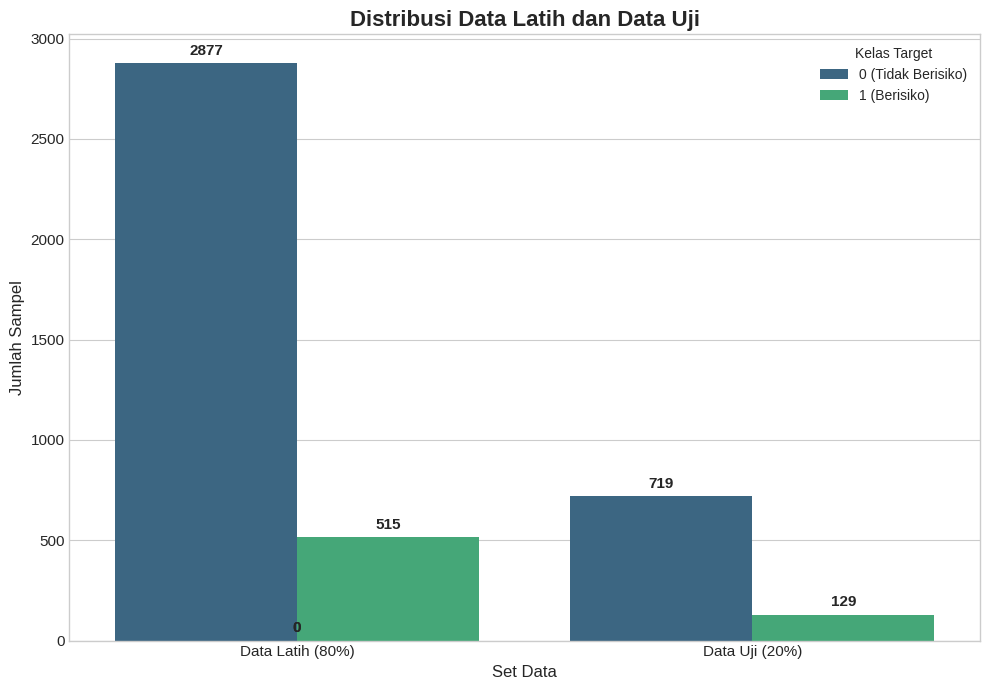

In [76]:
# =============================================================================
# Impor Library yang Diperlukan
# =============================================================================
# Pastikan library ini sudah diimpor di awal skrip Anda.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =============================================================================
# Asumsi: Variabel berikut sudah ada dari langkah sebelumnya
# =============================================================================
# y_train: Target dari data latih (hasil dari train_test_split)
# y_test: Target dari data uji (hasil dari train_test_split)
# =============================================================================


# =============================================================================
# 1. Menyiapkan Data untuk Visualisasi
# =============================================================================
# Hitung jumlah sampel untuk setiap kelas di data latih dan uji
train_counts = y_train.value_counts().rename('jumlah').reset_index()
train_counts['set'] = 'Data Latih (80%)'

test_counts = y_test.value_counts().rename('jumlah').reset_index()
test_counts['set'] = 'Data Uji (20%)'

# Gabungkan kedua data menjadi satu DataFrame
plot_data = pd.concat([train_counts, test_counts])

# Mengganti nama kolom dan nilai untuk legenda yang lebih jelas
plot_data = plot_data.rename(columns={'TenYearCHD': 'Kelas Risiko'})
plot_data['Kelas Risiko'] = plot_data['Kelas Risiko'].map({0.0: '0 (Tidak Berisiko)', 1.0: '1 (Berisiko)'})


# =============================================================================
# 2. Membuat Grafik Batang (Bar Chart)
# =============================================================================
print("--- Membuat Visualisasi Distribusi Data ---")

# Atur style dan ukuran plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))

# Buat bar plot menggunakan Seaborn
# x: Sumbu horizontal (Data Latih vs Data Uji)
# y: Sumbu vertikal (Jumlah sampel)
# hue: Grupkan bar berdasarkan Kelas Risiko
ax = sns.barplot(data=plot_data, x='set', y='jumlah', hue='Kelas Risiko', palette='viridis')

# Tambahkan judul dan label pada sumbu
plt.title('Distribusi Data Latih dan Data Uji', fontsize=16, fontweight='bold')
plt.xlabel('Set Data', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Kelas Target')

# =============================================================================
# 3. Menambahkan Anotasi Angka pada Setiap Batang
# =============================================================================
# Loop melalui setiap bar pada plot untuk menambahkan label angka
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),      # Format angka (tanpa desimal)
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posisi (x, y)
                ha = 'center', va = 'center',     # Penjajaran horizontal dan vertikal
                xytext = (0, 9),                  # Jarak teks dari bar
                textcoords = 'offset points',
                fontsize=11,
                fontweight='bold')

# Tampilkan plot
plt.tight_layout()
plt.show()


## ⚖️ Balancing Data dengan ADASYN

In [96]:
adasyn = ADASYN(random_state=42)
X_balanced, y_balanced = adasyn.fit_resample(X_train, y_train)
print("Distribusi setelah ADASYN:")
print(y_balanced.value_counts())


Distribusi setelah ADASYN:
TenYearCHD
1.0    2980
0.0    2877
Name: count, dtype: int64


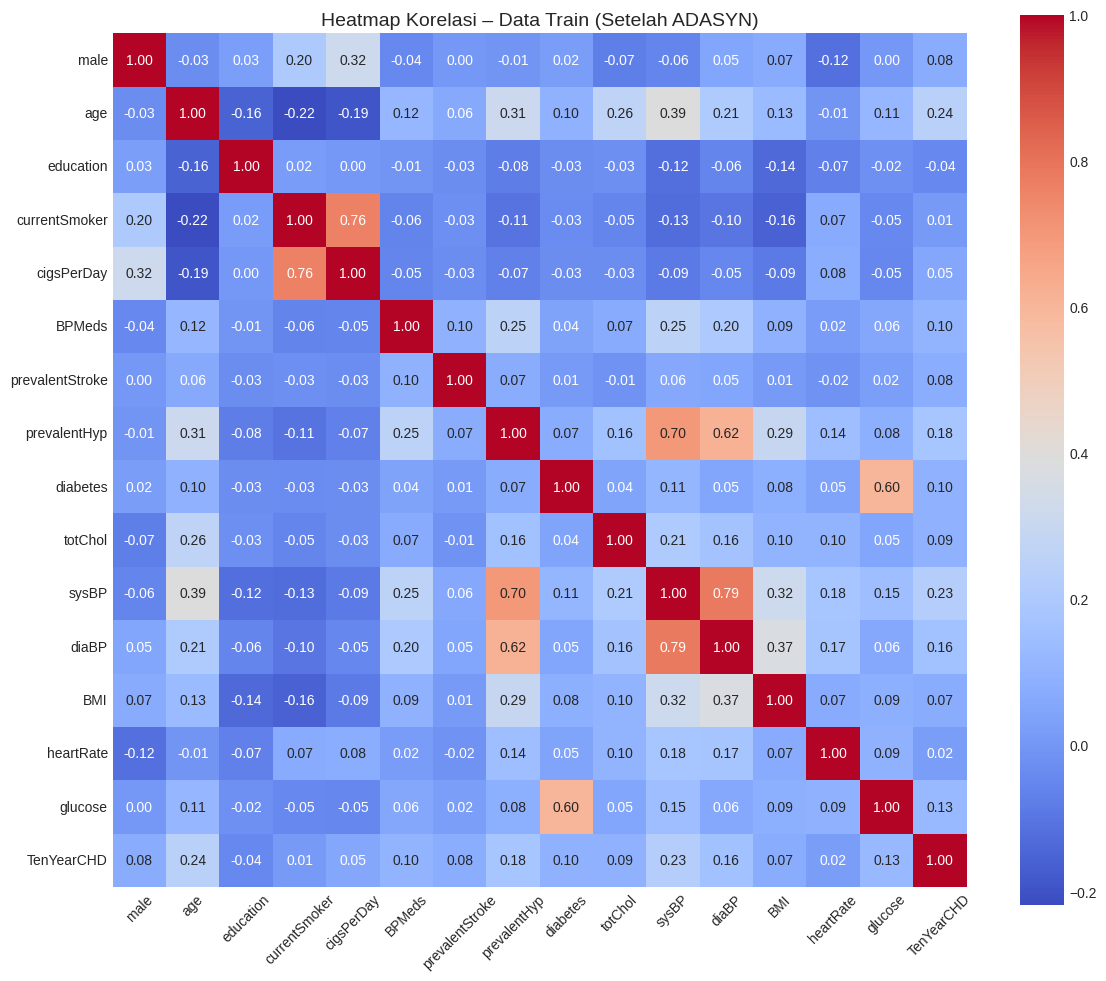

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan X_train hasil ADASYN dikonversi kembali ke DataFrame (jika belum)
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=X_test.columns)  # Gunakan kolom dari X_test

# Gabungkan label
X_train_full = X_train.copy()
X_train_full['TenYearCHD'] = y_train

# Heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_full.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi – Data Train (Setelah ADASYN)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


--- Membuat Visualisasi Hasil Penyeimbangan Data ---


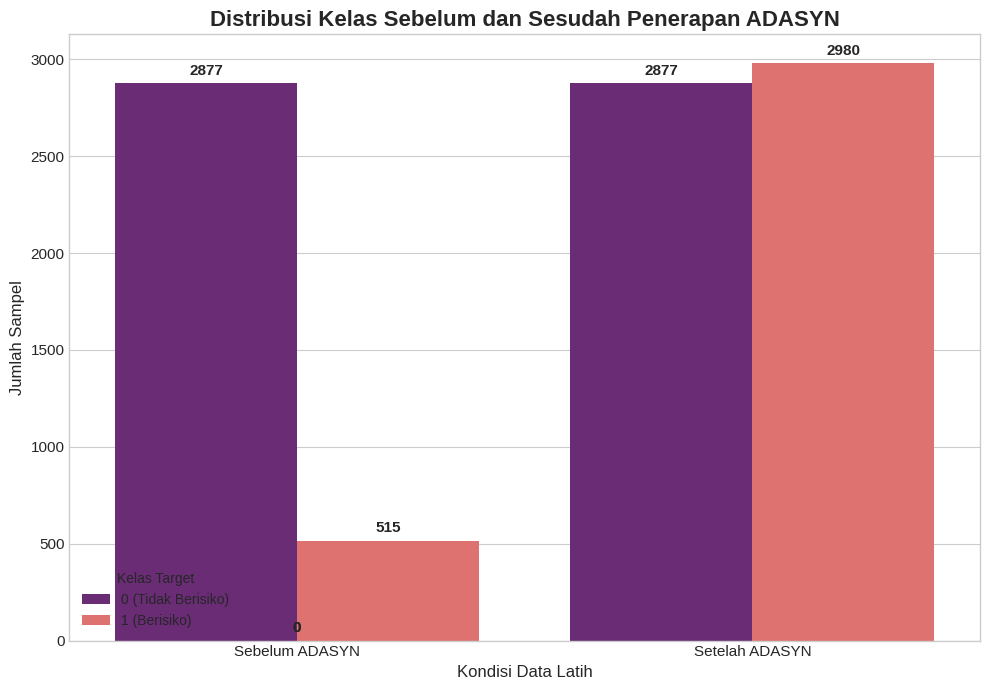

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =============================================================================
# Asumsi: Variabel berikut sudah ada dari langkah sebelumnya
# =============================================================================
# y_train: Target dari data latih SEBELUM ADASYN.
# y_balanced: Target dari data latih SETELAH ADASYN.
# =============================================================================


# =============================================================================
# 1. Menyiapkan Data untuk Visualisasi
# =============================================================================
# Hitung jumlah sampel untuk setiap kelas sebelum ADASYN
before_counts = y_train.value_counts().rename('jumlah').reset_index()
before_counts['kondisi'] = 'Sebelum ADASYN'

# Hitung jumlah sampel untuk setiap kelas setelah ADASYN
after_counts = y_balanced.value_counts().rename('jumlah').reset_index()
after_counts['kondisi'] = 'Setelah ADASYN'

# Gabungkan kedua data menjadi satu DataFrame untuk plotting
plot_data_adasyn = pd.concat([before_counts, after_counts])

# Mengganti nama kolom dan nilai untuk legenda yang lebih jelas
plot_data_adasyn = plot_data_adasyn.rename(columns={'TenYearCHD': 'Kelas Risiko'})
plot_data_adasyn['Kelas Risiko'] = plot_data_adasyn['Kelas Risiko'].map({0.0: '0 (Tidak Berisiko)', 1.0: '1 (Berisiko)'})


# =============================================================================
# 2. Membuat Grafik Batang (Bar Chart)
# =============================================================================
print("--- Membuat Visualisasi Hasil Penyeimbangan Data ---")

# Atur style dan ukuran plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))

# Buat bar plot menggunakan Seaborn untuk membandingkan kondisi
# x: Sumbu horizontal (Sebelum vs Setelah ADASYN)
# y: Sumbu vertikal (Jumlah sampel)
# hue: Grupkan bar berdasarkan Kelas Risiko
ax = sns.barplot(data=plot_data_adasyn, x='kondisi', y='jumlah', hue='Kelas Risiko', palette='magma')

# Tambahkan judul dan label pada sumbu
plt.title('Distribusi Kelas Sebelum dan Sesudah Penerapan ADASYN', fontsize=16, fontweight='bold')
plt.xlabel('Kondisi Data Latih', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Kelas Target')

# =============================================================================
# 3. Menambahkan Anotasi Angka pada Setiap Batang
# =============================================================================
# Loop melalui setiap bar pada plot untuk menambahkan label angka
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),      # Format angka (tanpa desimal)
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posisi (x, y)
                ha = 'center', va = 'center',     # Penjajaran horizontal dan vertikal
                xytext = (0, 9),                  # Jarak teks dari bar
                textcoords = 'offset points',
                fontsize=11,
                fontweight='bold')

# Tampilkan plot
plt.tight_layout()
plt.show()



## 🌲 Feature Selection (Random Forest)

In [97]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_balanced, y_balanced)
importances = pd.Series(rf.feature_importances_, index=X_balanced.columns)
top_features = importances.sort_values(ascending=False).head(10).index.tolist()
print("Top 10 fitur terpilih:", top_features)


Top 10 fitur terpilih: ['age', 'sysBP', 'heartRate', 'totChol', 'diaBP', 'education', 'glucose', 'BMI', 'cigsPerDay', 'male']


In [98]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Misal X_balanced, y_balanced sudah siap sebelumnya
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_balanced, y_balanced)

# Hitung importance untuk tiap fitur
importances = pd.Series(rf.feature_importances_, index=X_balanced.columns)

# Ambil 10 fitur teratas beserta skornya
top10 = importances.sort_values(ascending=False).head(10)

# Cetak nama fitur dan skornya
print("Top 10 fitur terpilih beserta skor importance:")
for feature, score in top10.items():
    print(f"{feature:15s}: {score:.4f}")


Top 10 fitur terpilih beserta skor importance:
age            : 0.1671
sysBP          : 0.1151
heartRate      : 0.1010
totChol        : 0.1007
diaBP          : 0.1002
education      : 0.1001
glucose        : 0.0923
BMI            : 0.0906
cigsPerDay     : 0.0604
male           : 0.0245


## 🔍 Hyperparameter Tuning (BayesSearchCV)

In [81]:

param_space = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'n_estimators': Integer(100, 300),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5),
    'reg_alpha': Real(0, 1.0),
    'reg_lambda': Real(0, 1.0)
}
bayes_search = BayesSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    search_spaces=param_space,
    n_iter=32,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    verbose=1,
    random_state=42
)
bayes_search.fit(X_balanced[top_features], y_balanced)
best_model = bayes_search.best_estimator_
print("Best Params:", bayes_search.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## 🧪 Threshold Tuning dan Evaluasi

In [101]:
# =============================================================================
# Impor Library yang Diperlukan
# =============================================================================
# Pastikan library ini sudah diimpor di awal skrip Anda.
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# =============================================================================
# Asumsi: Variabel berikut sudah ada dari langkah sebelumnya
# =============================================================================
# X_train: Fitur dari data latih yang ASLI (TIDAK seimbang).
# y_train: Target dari data latih yang ASLI (TIDAK seimbang).
# X_test: Fitur dari data uji.
# y_test: Target dari data uji.
# =============================================================================


# =============================================================================
# 1. Inisialisasi dan Pelatihan Model Baseline
# =============================================================================
print("--- Melatih dan Mengevaluasi Model Baseline (Tanpa ADASYN) ---")

# Inisialisasi model XGBClassifier dengan parameter default.
# Tidak ada tuning yang dilakukan pada tahap ini.
baseline_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Latih model pada data latih yang asli (tidak seimbang).
# Model ini akan belajar dari data yang bias terhadap kelas mayoritas.
baseline_model.fit(X_train, y_train)


# =============================================================================
# 2. Evaluasi Performa pada Data Uji
# =============================================================================
# Lakukan prediksi pada data uji.
y_pred_baseline = baseline_model.predict(X_test)
y_probs_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Cetak laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report untuk Model Baseline:")
print(classification_report(y_test, y_pred_baseline))

# Cetak confusion matrix
print("Confusion Matrix untuk Model Baseline:")
print(confusion_matrix(y_test, y_pred_baseline))

# Hitung dan cetak nilai AUC
auc_baseline = roc_auc_score(y_test, y_probs_baseline)
print(f"\nAUC untuk Model Baseline: {auc_baseline:.4f}")


--- Melatih dan Mengevaluasi Model Baseline (Tanpa ADASYN) ---

Classification Report untuk Model Baseline:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       719
         1.0       0.20      0.07      0.10       129

    accuracy                           0.82       848
   macro avg       0.53      0.51      0.50       848
weighted avg       0.75      0.82      0.78       848

Confusion Matrix untuk Model Baseline:
[[684  35]
 [120   9]]

AUC untuk Model Baseline: 0.6025


In [100]:
# Prediksi label secara default
y_pred = best_model.predict(X_test[top_features])

# Evaluasi hasil prediksi
print("=== Evaluasi Model (tanpa threshold tuning) ===")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Hitung dan cetak nilai AUC
auc_baseline = roc_auc_score(y_test, y_probs)
print(f"\nAUC untuk Model Baseline: {auc:.4f}")

=== Evaluasi Model (tanpa threshold tuning) ===
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       719
         1.0       0.27      0.25      0.26       129

    accuracy                           0.79       848
   macro avg       0.57      0.56      0.57       848
weighted avg       0.78      0.79      0.78       848

Confusion Matrix:
[[634  85]
 [ 97  32]]

AUC untuk Model Baseline: 0.6443


In [102]:
y_probs = best_model.predict_proba(X_test[top_features])[:, 1]
for threshold in [0.3, 0.4, 0.5]:
    print(f"\n=== Threshold {threshold} ===")
    y_pred = (y_probs >= threshold).astype(int)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Threshold 0.3 ===
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76       719
         1.0       0.23      0.54      0.32       129

    accuracy                           0.65       848
   macro avg       0.56      0.61      0.54       848
weighted avg       0.79      0.65      0.70       848

Confusion Matrix:
[[481 238]
 [ 59  70]]

=== Threshold 0.4 ===
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.82       719
         1.0       0.24      0.40      0.30       129

    accuracy                           0.72       848
   macro avg       0.56      0.59      0.56       848
weighted avg       0.78      0.72      0.74       848

Confusion Matrix:
[[558 161]
 [ 78  51]]

=== Threshold 0.5 ===
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       719
         1.0     

## 📈 ROC Curve

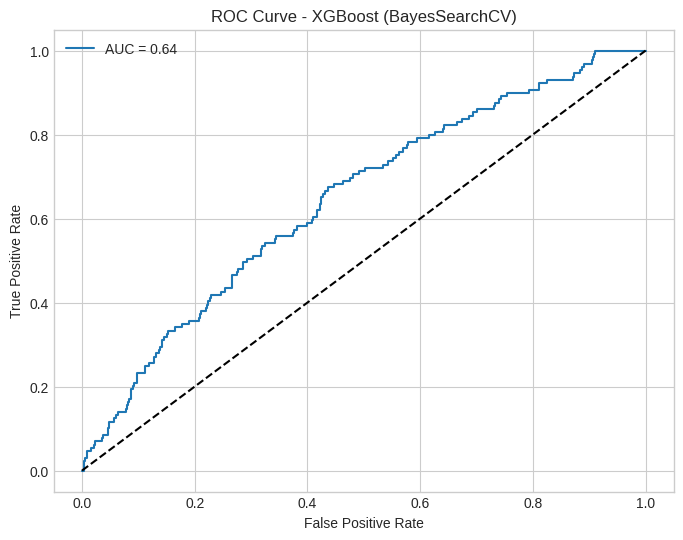

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (BayesSearchCV)")
plt.legend()
plt.grid(True)
plt.show()
